In [1]:
import sys
import os
import torch
import matplotlib.pyplot as plt
sys.path.append('..')
from src.utils import evaluate,load_Alamo,load_Ellis
from src.rotations import *
from src.averaging import *

# Load data

In [2]:
rel_rots,rel_rot_inds,rots_gt,valid_inds = load_Alamo('../data/Alamo.mat')
print('# Images: {}'.format(rots_gt.shape[0]))
print('# Relative rotations: {}'.format(len(rel_rots)))
device = 'cpu' # CPU is faster in current implementation
rel_rots = torch.from_numpy(rel_rots).to(device)
rel_rot_inds = torch.from_numpy(rel_rot_inds).to(device)
valid_inds = torch.from_numpy(valid_inds).to(device)
rots_gt = matrix_to_quaternion(torch.from_numpy(rots_gt).to(device))

# Images: 627
# Relative rotations: 97206


# L1 rotation averagin

In [4]:
steps = 3 # Weizfeld steps
sweeps = 1 # max iterations

solver = MultipleRotationSolver(steps=steps,sweeps=sweeps,progress_bar=True)
rot_pred = solver.solve(rel_rots,rel_rot_inds)
angles = evaluate(rot_pred,rots_gt,valid_inds)
angles = torch.sort(angles)[0]
median = float(angles[len(angles)//2])
print('[sweeps:{}/steps:{}] Angle Error: {:.4f}'.format(sweeps,steps,median))

100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.69s/it]

[sweeps:1/steps:3] Angle Error: 1.4006


# Plot error distribution

Text(0, 0.5, '# Images')

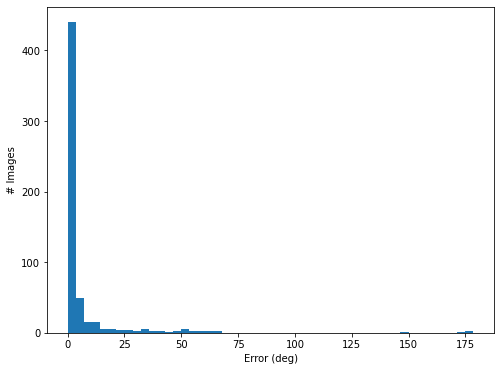

In [6]:
angles = angles.numpy()
plt.rcParams['figure.figsize'] = [8,6]
plt.hist(angles,bins=50)
plt.xlabel('Error (deg)')
plt.ylabel('# Images')